<a href="https://colab.research.google.com/github/Maxxx-VS/The-Founder/blob/master/39_4_Bert%3D%3D4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
# !pip install emoji==1.4.1
!pip install imblearn
!pip install --upgrade pandas

In [2]:
import numpy as np
import pandas as pd
import re, string
# import emoji
import nltk
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
seed=42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.despine()
plt.style.use("Solarize_Light2")
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight="bold", labelsize="large", titleweight="bold", titlepad=10)
import warnings
warnings.filterwarnings("ignore")

<Figure size 640x480 with 0 Axes>

In [3]:
df = pd.read_csv("/content/kaspi_reviews.csv", engine= 'python', encoding= 'utf-8')
df.columns

Index(['Unnamed: 0', 'text', 'plus', 'minus', 'language', 'rating',
       'category'],
      dtype='object')

In [4]:
df

Unnamed: 0                                               text  \
0                0  –ü–∞—Ä—Ñ—é–º –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π. –í—Å—ë, –∫–∞–∫ –≤ –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω...   
1                1  –ú–æ–π –ª—é–±–∏–º—ã–π DKNY. –ó–∞–ø–∞—Ö –ø—Ä–æ—Å—Ç–æ —à–∏–∫–∞—Ä–Ω—ã–π. –°–ø–∞—Å–∏...   
2                2                                                NaN   
3                3                                                NaN   
4                4  –ó–∞–ø–∞—Ö –ø—Ä–æ—Å—Ç–æ –∫–ª–∞—Å—Å–Ω—ã–π, –∫–∞–∫ —Ä–∞–∑ —Ç–æ, —á—Ç–æ –º–Ω–µ –Ω—É–∂...   
...            ...                                                ...   
119043      119043                                                NaN   
119044      119044  –í–ø–æ–ª–Ω–µ —Å–Ω–æ—Å–Ω—ã–µ –Ω–∞—É—à–Ω–∏–∫–∏, –Ω–æ, –¥—É–º–∞—é, –Ω–µ —Å—Ç–æ–∏—Ç —Å...   
119045      119045                              –ù–∞—É—à–Ω–∏–∫–∏ –ø—Ä–æ—Å—Ç–æ —Å—É–ø–µ—Ä   
119046      119046                                                NaN   
119047      119047                                                NaN   

                                                     plus  \
0                                                     NaN   
1                                                     NaN   
2       –®–∏–∫–∞—Ä–Ω—ã–π –∑–∞–ø–∞—Ö! –ë–µ–∑—É–º–Ω–æ –Ω—Ä–∞–≤–∏—Ç—Å—è! –ù–µ –ø–æ–∂–∞–ª–µ–µ—Ç–µ...   
3                                       –ò—ñ—Å—ñ “õ–∞—Ç—Ç—ã “±–Ω–∞–¥—ã.   
4       –ú–Ω–µ –≤—Å–µ –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å - –∏ –∫–∞—á–µ—Å—Ç–≤–æ —Ç–æ–≤–∞—Ä–∞, –∏ –∑–∞–ø...   
...                                                   ...   
119043  –ó–≤—É–∫ –≤—ã—à–µ —Å—Ä–µ–¥–Ω–µ–≥–æ, –Ω–µ–º–Ω–æ–≥–æ —Ç–æ–∫—Å–∏—á–Ω—ã–µ –≤—ã—Å–æ–∫–∏–µ ...   
119044                                                NaN   
119045                                                NaN   
119046                                          –í—Å—ë —Å—É–ø–µ—Ä   
119047  –û—Ç–ª–∏—á–Ω—ã–π –∑–≤—É–∫. –°–∏—Å—Ç–µ–º–∞ —à—É–º–æ–ø–æ–¥–∞–≤–ª–µ–Ω–∏—è. –ö–∞—á–µ—Å—Ç–≤...   

                                                    minus language  rating  \
0                                                     NaN  russian     5.0   
1                                                     NaN  russian     5.0   
2                                                     NaN  russian     5.0   
3                                                     NaN   kazakh     5.0   
4       –ï–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω–æ–µ, —á—Ç–æ –º–Ω–µ –Ω–µ –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å, —ç—Ç–æ —Ç–æ, ...  russian     4.0   
...                                                   ...      ...     ...   
119043                      –ù–µ—Ç aptx, –Ω–µ–º–Ω–æ–≥–æ —Ç—è–∂–µ–ª–æ–≤–∞—Ç—ã.  russian     5.0   
119044                                                NaN  russian     4.0   
119045                                                NaN  russian     5.0   
119046                                     –ë–∞—Å–æ–≤ –º–∞–ª–æ–≤–∞—Ç–æ  russian     4.0   
119047                            –ß—Ç–æ –Ω–µ –∫—É–ø–∏–ª –∏—Ö —Ä–∞–Ω—å—à–µ.  russian     5.0   

          category  
0         perfumes  
1         perfumes  
2         perfumes  
3         perfumes  
4         perfumes  
...            ...  
119043  headphones  
119044  headphones  
119045  headphones  
119046  headphones  
119047  headphones  

[119048 rows x 7 columns]

In [5]:
# –ü–µ—Ä–µ–º–µ—à–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç
df = df.sample(frac=1).reset_index(drop=True)

In [6]:
df

Unnamed: 0                                               text  \
0            47522                                                NaN   
1            63584                                                NaN   
2            96552  –ú–æ–∂–Ω–æ –∂–µ —É–∂–µ –ø—Ä–∏–Ω—è—Ç—å –∫–∞–∫–∏–µ-–Ω–∏–±—É–¥—å –º–µ—Ä—ã –ø–æ –ø–æ–Ω–∏...   
3            50237                                                NaN   
4            23188                                                NaN   
...            ...                                                ...   
119043      109147                                            –•–æ—Ä–æ—à–æ!   
119044       75536  –ø–æ—Å–ª–µ –∫–∞–∂–¥–æ–∏ÃÜ —É–±–æ—Ä–∫–∏ –ø–æ—Ä–∞–∂–∞—é—Å—å, –∫–∞–∫ –∂–µ –≥—Ä—è–∑–Ω–∞—è...   
119045       15628                                                NaN   
119046       20371                                                NaN   
119047      109562  –£–¥–æ–±–Ω—ã–∏ÃÜ –∏ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–∏ÃÜ –ø—Ä–∏–±–æ—Ä, –∫–æ—Ç–æ—Ä—ã–∏ÃÜ –ø–æ...   

                                                     plus  \
0       –ù–µ–ø–ª–æ—Ö–æ–π —Å–º–∞—Ä—Ç—Ñ–æ–Ω—ã –∑–∞ —Ç–∞–∫–∏–µ –¥–µ–Ω—å–≥–∏. –ì–æ–≤–æ—Ä—è—Ç Re...   
1                                                 –í—Å–µ –æ–∫.   
2                                                 –ë–æ–ª—å—à–æ–π   
3       –¢–æ–≤–∞—Ä –æ—Ç–ª–∏—á–Ω—ã–π, —Å–Ω–∏–º–∫–∏ —á–∏—Å—Ç—ã–µ, –≤ –æ–±—â–µ–º, —Å–æ–≤–µ—Ç—É...   
4       –¢–µ–ª–µ—Ñ–æ–Ω —Ö–æ—Ä–æ—à. <br>\n–ü–æ–ª—å–∑—É—é—Å—å –º–µ—Å—è—Ü. –ë—ã—Å—Ç—Ä–æ–¥–µ...   
...                                                   ...   
119043                                                NaN   
119044  —É–¥–æ–±–µ–Ω –∫–∞–∫ –≤ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏, —Ç–∞–∫ –∏ –≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü...   
119045                                            –û—Ç–ª–∏—á–Ω–æ   
119046            –¢–µ–ª–µ—Ñ–æ–Ω –æ—Ç–ª–∏—á–Ω—ã–π. –°—É–ø–µ—Ä, –≤—Å–µ —É—Å—Ç—Ä–∞–∏–≤–∞–µ—Ç   
119047  –ü—Ä–∏–±–æ—Ä–æ–º –¥–æ–≤–æ–ª—å–Ω–∞. –ù–µ –Ω–∞–¥–æ –∫ –Ω–µ–º—É –Ω–∏—á–µ–≥–æ –ø—Ä–∏–∫—É...   

                                                    minus language  rating  \
0                                                     NaN  russian     5.0   
1           –î–æ–ª–≥–æ–µ –æ–∂–∏–¥–∞–Ω–∏–µ –∫–Ω–∏–≥–∏ –Ω–∞ –∫–∞—Å—Å–µ - 20-30 –º–∏–Ω—É—Ç.  russian     5.0   
2       –®—É–º–Ω—ã–π, –º–æ–π —Å—Ç–∞—Ä—ã–π —Ç–∏—à–µ. –î—É–º–∞—é, –º–æ–∂–µ—Ç —Å–¥–∞—Ç—å –æ–±...  russian     3.0   
3                                                     NaN  russian     5.0   
4       –ù–µ –ø–æ–Ω—Ä–∞–≤–∏–ª—Å—è —á–µ—Ö–æ–ª –≤ –∫–æ—Ä–æ–±–∫–µ. –ó–∞–∫–∞–∑–∞–ª –Ω–æ–≤—ã–π. ...  russian     4.0   
...                                                   ...      ...     ...   
119043                                                NaN  russian     5.0   
119044  –Ω–µ–º–Ω–æ–≥–æ –¥–æ—Ä–æ–≥–æ–≤–∞—Ç –∫–æ–Ω–µ—á–Ω–æ. –ø–µ—Ä–µ–∫—Ä—É—á–∏–≤–∞–µ—Ç—Å—è —à–ª–∞...  russian     4.0   
119045                                                NaN  russian     5.0   
119046                                                NaN  russian     5.0   
119047                             –ø–æ–∫–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç –∫–∞–∫ –Ω–∞–¥–æ  russian     5.0   

                 category  
0             smartphones  
1                   books  
2           big-home-appl  
3         car-electronics  
4             smartphones  
...                   ...  
119043  climate-equipment  
119044    small-home-appl  
119045        smartphones  
119046        smartphones  
119047  climate-equipment  

[119048 rows x 7 columns]

In [7]:
# –£–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å –∫–∞–∑–∞—Ö—Å–∫–∏–º —è–∑—ã–∫–æ–º
df = df.drop(df[df['language'] == "kazakh"].index)

In [8]:
# –£–¥–∞–ª—è–µ–º –ª–∏—à–Ω–∏–µ —Å—Ç–æ–ª–±—Ü—ã
df = df.drop(['Unnamed: 0', 'plus', 'minus', 'language', 'rating'], axis=1)

In [9]:
# –£–¥–∞–ª—è–µ–º –≤—Å–µ —Å—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55938 entries, 2 to 119047
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      55938 non-null  object
 1   category  55938 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [11]:
df['category'].unique()

array(['big-home-appl', 'smartphones', 'power-banks', 'beauty',
       'kitchen-home-appl', 'car-electronics', 'climate-equipment',
       'small-home-appl', 'headphones', 'books', 'tires', 'car-audio',
       'perfumes', 'wearables', 'watches', 'memory-cards',
       'portable-speakers'], dtype=object)

In [12]:
df['category'].value_counts()

category
smartphones          21497
kitchen-home-appl     5961
small-home-appl       5803
big-home-appl         5556
beauty                3076
headphones            3076
climate-equipment     2451
tires                 1890
car-electronics       1833
perfumes              1072
watches                984
car-audio              961
wearables              840
power-banks            289
memory-cards           242
portable-speakers      214
books                  193
Name: count, dtype: int64

In [13]:
def conf_matrix(y, y_pred, title):
    fig, ax =plt.subplots(figsize=(15,15))
    labels = ['big-home-appl', 'perfumes', 'smartphones', 'climate-equipment',
       'power-banks', 'small-home-appl', 'beauty', 'headphones',
       'memory-cards', 'kitchen-home-appl', 'car-electronics', 'tires',
       'watches', 'wearables', 'car-audio', 'portable-speakers', 'books']

    ax=sns.heatmap(confusion_matrix(y, y_pred), annot=True, cmap="Blues", fmt='g', cbar=False, annot_kws={"size":25})
    plt.title(title, fontsize=20)
    ax.xaxis.set_ticklabels(labels, fontsize=7)
    ax.yaxis.set_ticklabels(labels, fontsize=7)
    ax.set_ylabel('–¢–µ—Å—Ç', fontsize=20)
    ax.set_xlabel('–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ', fontsize=20)
    plt.show()

In [14]:
df

text           category
2       –ú–æ–∂–Ω–æ –∂–µ —É–∂–µ –ø—Ä–∏–Ω—è—Ç—å –∫–∞–∫–∏–µ-–Ω–∏–±—É–¥—å –º–µ—Ä—ã –ø–æ –ø–æ–Ω–∏...      big-home-appl
5         –¢–µ–ª–µ—Ñ–æ–Ω –æ–≥–æ–Ω—å. –í—Å—ë —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç. –°–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å        smartphones
6       –°–æ–≤–µ—Ç—É—é –≤—Å–µ–º. –ù—É–∂–Ω–∞—è –≤–µ—â—å. –î–æ—Å—Ç–∞–≤–∏–ª–∏ –±—ã—Å—Ç—Ä–æ. –í...        power-banks
7       –û–æ–æ—á–µ–Ω—å –¥–æ–ª–≥–æ –≤—ã–±–∏—Ä–∞–ª–∞ —Å–µ–±–µ –∫—Ä—É—Ç—è—â—É—é—Å—è —Ñ–µ–Ω-—â–µ—Ç...             beauty
9       –ü–æ–∫—É–ø–∫–æ–π –¥–æ–≤–æ–ª–µ–Ω, –≤—Å–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –æ–ø–∏—Å–∞–Ω–∏—é –∏...      big-home-appl
...                                                   ...                ...
119040                                    –•–æ—Ä–æ—à–∞—è –º–æ–¥–µ–ª—å.  kitchen-home-appl
119042                –ü—Ä–æ—Å—Ç–æ —Å—É–ø–µ—Ä! –®–∏–∫–∞—Ä–Ω—ã–π —Ö–æ–ª–æ–¥–∏–ª—å–Ω–∏–∫!      big-home-appl
119043                                            –•–æ—Ä–æ—à–æ!  climate-equipment
119044  –ø–æ—Å–ª–µ –∫–∞–∂–¥–æ–∏ÃÜ —É–±–æ—Ä–∫–∏ –ø–æ—Ä–∞–∂–∞—é—Å—å, –∫–∞–∫ –∂–µ –≥—Ä—è–∑–Ω–∞—è...    small-home-appl
119047  –£–¥–æ–±–Ω—ã–∏ÃÜ –∏ —Ñ—É–Ω–∫—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–∏ÃÜ –ø—Ä–∏–±–æ—Ä, –∫–æ—Ç–æ—Ä—ã–∏ÃÜ –ø–æ...  climate-equipment

[55938 rows x 2 columns]

In [15]:
df_train = df[:40000]
df_test = df[40001:]

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 2 to 85269
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      40000 non-null  object
 1   category  40000 non-null  object
dtypes: object(2)
memory usage: 937.5+ KB


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15937 entries, 85272 to 119047
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      15937 non-null  object
 1   category  15937 non-null  object
dtypes: object(2)
memory usage: 373.5+ KB


In [18]:
# def strip_emoji(text):
#     return re.sub(emoji.get_emoji_regexp(), r"", text) #—É–¥–∞–ª—è–µ–º emoji (—Å–º–∞–π–ª–∏–∫–∏)

# # –£–¥–∞–ª—è–µ–º –ø—É–Ω–∫—Ç—É–∞—Ü–∏—é, —Å—Å—ã–ª–∫–∏, —É–ø–æ–º–∏–Ω–∞–Ω–∏–µ –¥—Ä—É–≥–∏—Ö —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤, —Å–∏–º–≤–æ–ª—ã –∫–æ–Ω—Ü–∞ —Å—Ç—Ä–æ–∫–∏ –∏ –ø–µ—Ä–µ–Ω–æ—Å–∞ \r\n
# def strip_all_entities(text):
#     text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() # —É–¥–∞–ª—è–µ–º \n –∏ \r –∏ –ø–µ—Ä–µ–≤–æ–¥–∏–º —Å—Ç—Ä–æ–∫—É –≤ –Ω–∏–∂–Ω–∏–π —Ä–µ–≥–∏—Å—Ç—Ä
#     text = re.sub(r"(?:\@|https?\://)\S+", "", text) # —É–¥–∞–ª–µ–Ω–∏–µ —Å—Å—ã–ª–æ–∫ –∏ —É–ø–æ–º–∏–Ω–∞–Ω–∏–π –¥—Ä—É–≥–∏—Ö —É—á–∞—Å—Ç–Ω–∏–∫–æ–≤
#     text = re.sub(r'[^\x00-\x7f]',r'', text) # —É–¥–∞–ª–µ–Ω–∏–µ —Å–∏–º–≤–æ–ª–æ–≤ –Ω–µ utf8/ascii, —Ç–∞–∫–∏—Ö –∫–∞–∫ '\x9a\x91\x97\x9a\x97'
#     banned_list= string.punctuation + '√É'+'¬±'+'√£'+'¬º'+'√¢'+'¬ª'+'¬ß' # —Å–∏–º–≤–æ–ª—ã –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è, –≤–∫–ª—é—á–∞—è –ø—É–Ω–∫—Ç—É–∞—Ü–∏—é
#     table = str.maketrans('', '', banned_list) # —Å–æ–∑–¥–∞–Ω–∏–µ —Å–ª–æ–≤–∞—Ä—è –∑–∞–º–µ–Ω—ã
#     text = text.translate(table) # –ø—Ä–∏–º–µ–Ω–µ–Ω–∏–µ –∫ —Å—Ç—Ä–æ–∫–µ —Å–ª–æ–≤–∞—Ä—è –∑–∞–º–µ–Ω—ã
#     return text

# # —É–±–∏—Ä–∞–µ–º —Ö—ç—à—Ç–µ–≥–∏ –≤ –∫–æ–Ω—Ü–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –∏ –æ—Å—Ç–∞–≤–ª—è–µ–º –≤ —Å–µ—Ä–µ–¥–∏–Ω–µ, —É–¥–∞–ª–∏–≤ —Ç–æ–ª—å–∫–æ —Å–∏–º–≤–æ–ª #
# def clean_hashtags(tweet):
#     new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) # —É–¥–∞–ª–µ–Ω–∏–µ –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ —Ö—ç—à—Ç–µ–≥–∞
#     new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) # —É–¥–∞–ª–µ–Ω–∏–µ —Å–∏–º–≤–æ–ª–∞ —Ö—ç—à—Ç–µ–≥–∞ –≤ —Å–µ—Ä–µ–¥–∏–Ω–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è
#     return new_tweet2

# # –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤, —Ç–∞–∫–∏—Ö –∫–∞–∫ & –∏ $, –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö –≤ –Ω–µ–∫–æ—Ç–æ—Ä—ã—Ö —Å–ª–æ–≤–∞—Ö
# def filter_chars(a):
#     sent = []
#     for word in a.split(' '):
#         if ('$' in word) | ('&' in word):
#             sent.append('')
#         else:
#             sent.append(word)
#     return ' '.join(sent)

# def remove_mult_spaces(text): # —É–¥–∞–ª–µ–Ω–∏–µ –º–Ω–æ–∂–µ—Å—Ç–≤–µ–Ω–Ω—ã—Ö –ø—Ä–æ–±–µ–ª–æ–≤ —Å –ø–æ–º–æ—â—å—é —Ä–µ–≥—É–ª—è—Ä–∫–∏
#     return re.sub("\s\s+" , " ", text)

In [19]:
texts_new = []
for t in df_train.text:
    texts_new.append(t)

In [20]:
texts_new_test = []
for t in df_test.text:
    texts_new_test.append(t)

In [21]:
# texts_new = []
# for t in df_train.text:
#     texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

In [22]:
# texts_new_test = []
# for t in df_test.text:
#     texts_new_test.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

In [23]:
df_train['text_clean'] = texts_new
df_test['text_clean'] = texts_new_test

In [24]:
df_train['text_clean'].head(3)

2    –ú–æ–∂–Ω–æ –∂–µ —É–∂–µ –ø—Ä–∏–Ω—è—Ç—å –∫–∞–∫–∏–µ-–Ω–∏–±—É–¥—å –º–µ—Ä—ã –ø–æ –ø–æ–Ω–∏...
5      –¢–µ–ª–µ—Ñ–æ–Ω –æ–≥–æ–Ω—å. –í—Å—ë —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç. –°–æ–≤–µ—Ç—É—é –±—Ä–∞—Ç—å
6    –°–æ–≤–µ—Ç—É—é –≤—Å–µ–º. –ù—É–∂–Ω–∞—è –≤–µ—â—å. –î–æ—Å—Ç–∞–≤–∏–ª–∏ –±—ã—Å—Ç—Ä–æ. –í...
Name: text_clean, dtype: object

In [25]:
df_test['text_clean'].head(3)

85272    –ü–æ–∫—É–ø–∞–ª–∏ —Ç–µ–ª–µ—Ñ–æ–Ω —Ä–µ–±—ë–Ω–∫—É –Ω–∞ –¥–µ–Ω—å —Ä–æ–∂–¥–µ–Ω–∏—è, –≤—Å–µ...
85276                 –û—á–µ–Ω—å —Ö–æ—Ä–æ—à–∞—è –ø–µ—á–∫–∞, –º–Ω–µ –ø–æ–Ω—Ä–∞–≤–∏–ª–æ—Å—å
85280                   –ü–æ–∫—É–ø–∞–ª–∏ —Å–≤–µ–∫—Ä–æ–≤–∏, –æ–Ω–∞ –≤ –≤–æ—Å—Ç–æ—Ä–≥–µ!
Name: text_clean, dtype: object

In [26]:
text_len = []
for text in df_train.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

df_train['text_len'] = text_len

In [27]:
text_len_test = []
for text in df_test.text_clean:
    tweet_len = len(text.split())
    text_len_test.append(tweet_len)

df_test['text_len'] = text_len_test

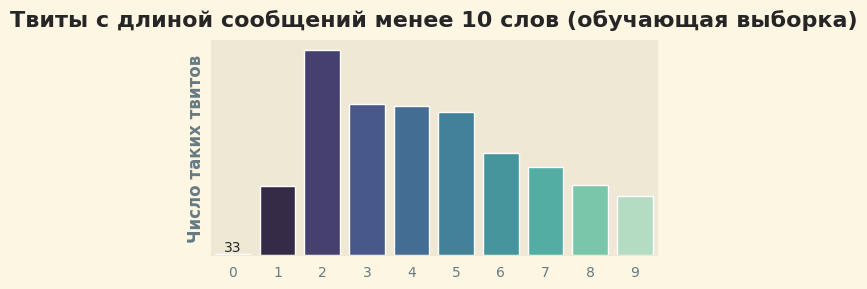

In [28]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x='text_len', data=df_train[df_train['text_len']<10], palette='mako')
plt.title('–¢–≤–∏—Ç—ã —Å –¥–ª–∏–Ω–æ–π —Å–æ–æ–±—â–µ–Ω–∏–π –º–µ–Ω–µ–µ 10 —Å–ª–æ–≤ (–æ–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞)')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('–ß–∏—Å–ª–æ —Ç–∞–∫–∏—Ö —Ç–≤–∏—Ç–æ–≤')
plt.xlabel('')
plt.show()

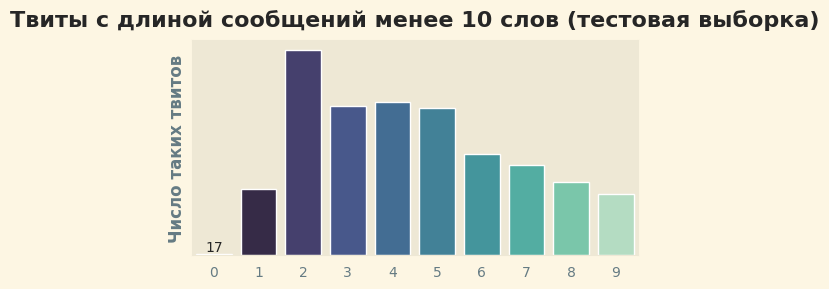

In [29]:
plt.figure(figsize=(5,3))
ax = sns.countplot(x='text_len', data=df_test[df_test['text_len']<10], palette='mako')
plt.title('–¢–≤–∏—Ç—ã —Å –¥–ª–∏–Ω–æ–π —Å–æ–æ–±—â–µ–Ω–∏–π –º–µ–Ω–µ–µ 10 —Å–ª–æ–≤ (—Ç–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞)')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('–ß–∏—Å–ª–æ —Ç–∞–∫–∏—Ö —Ç–≤–∏—Ç–æ–≤')
plt.xlabel('')
plt.show()

In [30]:
print(f"–§–æ—Ä–º–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: {df_train.shape}")
print(f"–§–æ—Ä–º–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: {df_test.shape}")

–§–æ—Ä–º–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: (40000, 4)
–§–æ—Ä–º–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: (15937, 4)


In [31]:
df_train = df_train[df_train['text_len'] > 0]
df_test = df_test[df_test['text_len'] > 0]

In [32]:
print(f"–§–æ—Ä–º–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: {df_train.shape}")
print(f"–§–æ—Ä–º–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: {df_test.shape}")

–§–æ—Ä–º–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏ –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: (39967, 4)
–§–æ—Ä–º–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏ –ø–æ—Å–ª–µ –æ—á–∏—Å—Ç–∫–∏: (15920, 4)


In [33]:
tokenizer = BertTokenizerFast.from_pretrained('seara/rubert-tiny2-russian-sentiment')

tokenizer_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [34]:
token_lens = []

for txt in df_train['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏: {max_len}")

–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏: 512


In [35]:
token_lens = []

for i,txt in enumerate(df_train['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")

INDEX: 3, TEXT: –û–æ–æ—á–µ–Ω—å –¥–æ–ª–≥–æ –≤—ã–±–∏—Ä–∞–ª–∞ —Å–µ–±–µ –∫—Ä—É—Ç—è—â—É—é—Å—è —Ñ–µ–Ω-—â–µ—Ç–∫—É,—Ç.–∫ –ø–æ–¥—Å—Ç—Ä–∏–≥–ª–∞ –≤–æ–ª–æ—Å—ã —á—É—Ç—å –≤—ã—à–µ –ø–ª–µ—á –∏ –æ—Ç –µ–∂–µ–¥–Ω–µ–≤–Ω—ã—Ö —É–∫–ª–∞–¥–æ–∫ –æ–±—ã—á–Ω—ã–º —Ñ–µ–Ω–æ–º –∏ –∫—Ä—É–≥–ª–æ–∏ÃÜ —Ä–∞—Å—á–µ—Å–∫–∏  —Å–∏–ª—å–Ω–æ —É—Å—Ç–∞–≤–∞–ª–∏ —Ä—É–∫–∏.<br>–•–æ—á—É —Å–∫–∞–∑–∞—Ç—å,—á—Ç–æ —É–∫–ª–∞–¥–∫–∞ —ç—Ç–æ–∏ÃÜ —Ñ–µ–Ω-—â–µ—Ç–∫–æ–∏ÃÜ -—Å–ø–ª–æ—à–Ω–æ–µ —É–¥–æ–≤–æ–ª—å—Å—Ç–≤–∏–µ! –û—á–µ–Ω—å –ø—Ä–æ—Å—Ç–æ! –û—á–µ–Ω—å –±—ã—Å—Ç—Ä–æ! –ò –¥–∞–∂–µ –ø—Ä–∏—è—Ç–Ω–æ! )) –†—É–∫–∞ –Ω–µ —É—Å—Ç–∞–µ—Ç –≤–æ–æ–±—â–µ ! –°—Ç–∞–≤–ª—é –Ω–∞ —Ä–µ–∂–∏–º Care –∏ –¢–ïÃà–ü–õ–´–ú –≤–æ–∑–¥—É—Ö–æ–º ,—Å–æ–≤–µ—Ä—à–µ–Ω–Ω–æ –Ω–µ –ø–æ–≤—Ä–µ–∂–¥–∞—è –≤–æ–ª–æ—Å—ã –¥–µ–ª–∞—é —É–∫–ª–∞–¥–∫—É.<br>–ù–û! –≠—Ç–∞ —â–µ—Ç–∫–∞ –Ω–∞—Å—Ç–æ–ª—å–∫–æ –ò–î–ï–ê–õ–¨–ù–û —Ä–∞–∑–≥–ª–∞–∂–∏–≤–∞–µ—Ç –∏ –ø–æ–ª–∏—Ä—É–µ—Ç –≤–æ–ª–æ—Å—ã,—á—Ç–æ –æ–±—ä–µ–º–∞ –Ω–µ—Ç –≤–æ–æ–±—â–µ (( –í–æ–ª–æ—Å–∏–Ω–∫–∞ –∫ –≤–æ–ª–æ—Å–∏–Ω–∫–µ ! –ë–ª–µ—Å–∫ –≤–æ–ª–æ—Å –ø–æ—Ç—Ä—è—Å–∞—é—â–∏–∏ÃÜ ! –ù–û  –ø—Ä–∏—á–µ—Å

In [36]:
df_train['token_lens'] = token_lens

In [37]:
df_train = df_train.sort_values(by='token_lens', ascending=False)
df_train.head(3)

text       category  \
69622  –û–±—â–µ–µ –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏–µ - –º–∞—à–∏–Ω–∫–∞ –≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞! <br...  big-home-appl   
43248  –ú–Ω–æ–≥–æ –Ω–∞–ø–∏—Å–∞–Ω–æ —É–∂–µ, –±—É–¥—É –∫—Ä–∞—Ç–æ–∫!<br>–°–º–∞—Ä—Ç –∫—É–ø–ª...    smartphones   
32254  –î–≤–∞ –≥–æ–¥–∞ –Ω–∞–∑–∞–¥ (–≤ —Å–µ–Ω—Ç—è–±—Ä–µ 2014) –º–Ω–µ –ø–æ–¥–∞—Ä–∏–ª–∏ ...     headphones   

                                              text_clean  text_len  token_lens  
69622  –û–±—â–µ–µ –≤–ø–µ—á–∞—Ç–ª–µ–Ω–∏–µ - –º–∞—à–∏–Ω–∫–∞ –≤–æ—Å—Ö–∏—Ç–∏—Ç–µ–ª—å–Ω–∞! <br...       312         512  
43248  –ú–Ω–æ–≥–æ –Ω–∞–ø–∏—Å–∞–Ω–æ —É–∂–µ, –±—É–¥—É –∫—Ä–∞—Ç–æ–∫!<br>–°–º–∞—Ä—Ç –∫—É–ø–ª...       288         512  
32254  –î–≤–∞ –≥–æ–¥–∞ –Ω–∞–∑–∞–¥ (–≤ —Å–µ–Ω—Ç—è–±—Ä–µ 2014) –º–Ω–µ –ø–æ–¥–∞—Ä–∏–ª–∏ ...       286         512

In [38]:
# df_train = df_train.sample(frac=1).reset_index(drop=True)

In [39]:
token_lens_test = []

for txt in df_test['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))

max_len=np.max(token_lens_test)
print(f"–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏: {max_len}")

–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏: 512


In [40]:
token_lens_test = []

for i,txt in enumerate(df_test['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens_test.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")

INDEX: 9, TEXT: –ù–µ —Å–º–æ—Ç—Ä—è –Ω–∞ –≤—Å–µ –º–∏–Ω—É—Å—ã - –ø—ã–ª–∏–∫ –º–∏—Ä–æ–≤–æ–∏ÃÜ. –£ –º–µ–Ω—è –æ–Ω —É–∂–µ –æ–∫–æ–ª–æ 2,5 –ª–µ—Ç –ø–∞—à–µ—Ç, –∫–∞–∫ —Ä–∞–±. –ü–æ–ª—å–∑—É—é –∏ –¥–æ–º–∞ –∏ –¥–ª—è —á–∏—Å—Ç–∫–∏ –∞–≤—Ç–æ–º–æ–±–∏–ª–µ–∏ÃÜ. –ü–µ—Ä–≤—ã–∏ÃÜ —Ç–µ—Å—Ç - –¥—Ä–∞–∏ÃÜ–≤ –ø—Ä–æ—à–µ–ª –¥–æ–º–∞ –ø—Ä–∏ —á–∏—Å—Ç–∫–µ –≤—Å–µ—Ö –∫–æ–≤—Ä–æ–≤ (–∫–æ–≤—Ä—ã –Ω–µ —á–∏—Å—Ç–∏–ª–∏—Å—å –ø–æ—Å–ª–µ —Ä–µ–º–æ–Ω—Ç–∞ –≥–æ–¥–∞ –¥–≤–∞, –≤ –∫–≤–∞—Ä—Ç–∏—Ä–µ –Ω–∏–∫—Ç–æ –Ω–µ –∂–∏–ª, –ø–æ—Ç–æ–º –µ—â–µ –ø–æ–ª –≥–æ–¥–∞ –ø—Ä–∏ –º–Ω–µ –∏ –º–æ–µ–∏ÃÜ —Å–æ–±–∞–∫–µ). –ò–∑ –ø—ã–ª—å–Ω—ã—Ö, –∑–∞—Ç–æ–ø—Ç–∞–Ω–Ω—ã—Ö –≤–∞–ª–µ–Ω–∫–æ–≤ –ø—Ä–µ–≤—Ä–∞—Ç–∏–ª–∏—Å—å –≤ —è—Ä–∫–∏–µ –∏ –ø—É—à–∏—Å—Ç—ã–µ. –í–æ—Ä—Å –Ω–∞ –ø—Ä–æ—Ç–æ–ø—Ç–∞–Ω–Ω—ã—Ö –º–µ—Å—Ç–∞—Ö –≤–∑–¥—ã–±–∏–ª—Å—è. –ü—ã–ª–µ—Å–æ—Å–∏—Ç—å –∫–æ–≤—Ä—ã –Ω–∞–ø—Ä—è–∂–Ω–æ, —Ç–∞–∫ –∫–∞–∫ –ø—Ä–∏–ª–∏–ø–∞–µ—Ç –∞—Ü–∫–µ. –ü–µ—Ä–µ–∫–ª—é—á–∞–ª–∞ —â–µ—Ç–∫—É –≤ —Ä–µ–∂–∏–º &quot;–ø–∞—Ä–∫–µ—Ç&quot; –∏ —Ç–æ–≥–¥–∞ –º–æ–∂–Ω–æ –±–æ–ª–µ–µ - –º–µ–Ω–µ–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ –≤–æ–∑—é–∫–∞—Ç—å –ø–æ –∫–æ–≤—Ä—

In [41]:
df_test['token_lens'] = token_lens_test

In [42]:
df_test = df_test.sort_values(by='token_lens', ascending=False)
df_test.head(3)

text           category  \
96369  –ü—Ä–∏–≤–µ—Ç!<br><br>–í–æ—Ç —É–∂–µ —Å –º–µ—Å—è—Ü –ø–æ–ª—å–∑—É—é—Å—å http:...             beauty   
96401  –ú–Ω–æ–≥–æ –Ω–∞–ø–∏—Å–∞–Ω–æ —É–∂–µ, –±—É–¥—É –∫—Ä–∞—Ç–æ–∫!<br>–°–º–∞—Ä—Ç –∫—É–ø–ª...        smartphones   
96017  –ù—é–∞–Ω—Å—ã, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –∫–æ–º—É-—Ç–æ –Ω–µ –ø–æ–Ω—Ä–∞–≤–∏—Ç—å—Å—è:<...  kitchen-home-appl   

                                              text_clean  text_len  token_lens  
96369  –ü—Ä–∏–≤–µ—Ç!<br><br>–í–æ—Ç —É–∂–µ —Å –º–µ—Å—è—Ü –ø–æ–ª—å–∑—É—é—Å—å http:...       267         512  
96401  –ú–Ω–æ–≥–æ –Ω–∞–ø–∏—Å–∞–Ω–æ —É–∂–µ, –±—É–¥—É –∫—Ä–∞—Ç–æ–∫!<br>–°–º–∞—Ä—Ç –∫—É–ø–ª...       288         512  
96017  –ù—é–∞–Ω—Å—ã, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –∫–æ–º—É-—Ç–æ –Ω–µ –ø–æ–Ω—Ä–∞–≤–∏—Ç—å—Å—è:<...       284         512

In [43]:
# df_test = df_test.sample(frac=1).reset_index(drop=True)

In [44]:
df_train['category'].value_counts()

category
smartphones          15383
kitchen-home-appl     4272
small-home-appl       4134
big-home-appl         3959
beauty                2214
headphones            2192
climate-equipment     1739
tires                 1348
car-electronics       1314
perfumes               771
watches                695
car-audio              684
wearables              591
power-banks            207
memory-cards           177
portable-speakers      150
books                  137
Name: count, dtype: int64

In [45]:
df_train['category'] = df_train['category'].map({'big-home-appl':0, 'perfumes':1, 'smartphones':2, 'climate-equipment':3,
       'power-banks':4, 'small-home-appl':5, 'beauty':6, 'headphones':7,
       'memory-cards':8, 'kitchen-home-appl':9, 'car-electronics':10, 'tires':11,
       'watches':12, 'wearables':13, 'car-audio':14, 'portable-speakers':15, 'books':16})

df_test['category'] = df_test['category'].map({'big-home-appl':0, 'perfumes':1, 'smartphones':2, 'climate-equipment':3,
       'power-banks':4, 'small-home-appl':5, 'beauty':6, 'headphones':7,
       'memory-cards':8, 'kitchen-home-appl':9, 'car-electronics':10, 'tires':11,
       'watches':12, 'wearables':13, 'car-audio':14, 'portable-speakers':15, 'books':16})

In [46]:
df_train['category'].value_counts()

category
2     15383
9      4272
5      4134
0      3959
6      2214
7      2192
3      1739
11     1348
10     1314
1       771
12      695
14      684
13      591
4       207
8       177
15      150
16      137
Name: count, dtype: int64

In [47]:
df_test['category'].value_counts()

category
2     6097
9     1686
5     1666
0     1586
7      879
6      862
3      709
11     538
10     518
1      300
12     288
14     276
13     249
4       82
8       65
15      64
16      55
Name: count, dtype: int64

In [48]:
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(df_train['text_clean']).reshape(-1, 1), np.array(df_train['category']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['text_clean', 'category']);

In [49]:
train_os['category'].value_counts()

category
0     15383
2     15383
7     15383
10    15383
9     15383
3     15383
5     15383
6     15383
14    15383
13    15383
12    15383
11    15383
1     15383
15    15383
16    15383
4     15383
8     15383
Name: count, dtype: int64

In [50]:
X = train_os['text_clean'].values
y = train_os['category'].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y, random_state=seed)

X_test = df_test['text_clean'].values
y_test = df_test['category'].values

y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [51]:
print(y_train.shape)
print(y_valid.shape)

(235359,)
(26152,)


In [52]:
ohe = preprocessing.OneHotEncoder()

y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [53]:
print(y_train.shape)
print(y_valid.shape)

(235359, 17)
(26152, 17)


In [54]:
print(f"–¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞: {X_train.shape[0]}")
print(f"–ü—Ä–æ–≤–µ—Ä–æ—á–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞: {X_valid.shape[0]}")
print(f"–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞: {X_test.shape[0]}")

–¢—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞: 235359
–ü—Ä–æ–≤–µ—Ä–æ—á–Ω–∞—è –≤—ã–±–æ—Ä–∫–∞: 26152
–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞: 15920


In [55]:
# –¢–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä
def tokenize(data, max_len=128):
    input_ids = []
    attention_masks = []

    for text in data:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_tensors="pt"
        )
        input_ids.append(encoded['input_ids'].squeeze().tolist())
        attention_masks.append(encoded['attention_mask'].squeeze().tolist())

    return np.array(input_ids, dtype=np.int32), np.array(attention_masks, dtype=np.int32)

In [56]:
print(X_train.shape)
print(X_train.dtype)

(235359,)
object


In [57]:
train_input_ids, train_attention_masks = tokenize(X_train)
val_input_ids, val_attention_masks = tokenize(X_valid)
test_input_ids, test_attention_masks = tokenize(X_test)

In [58]:
bert_model = TFBertModel.from_pretrained('seara/rubert-tiny2-russian-sentiment')

config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['classifier.weight', 'classifier.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [59]:
def create_model(bert_model, max_len=128):

    opt = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-7) # –æ–ø—Ç–∏–º–∏–∑–∞—Ç–æ—Ä - Adam
    loss = tf.keras.losses.CategoricalCrossentropy()                      # —Ñ—É–Ω–∫—Ü–∏—è –ø–æ—Ç–µ—Ä—å - –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–∞—è –∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏—è
    accuracy = tf.keras.metrics.CategoricalAccuracy()                     # –º–µ—Ç—Ä–∏–∫–∞ - –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å
    input_ids = tf.keras.Input(shape=(max_len,), dtype='int32')         # –≤—Ö–æ–¥ –¥–ª—è —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
    attention_masks = tf.keras.Input(shape=(max_len,), dtype='int32')   # –º–∞—Å–∫–∞
    embeddings = bert_model([input_ids, attention_masks])[1]            # BERT-–º–æ–¥–µ–ª—å
    output = tf.keras.layers.Dense(17, activation="softmax")(embeddings) # –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ OHE (3 –Ω–µ–π—Ä–æ–Ω–∞ - 3 –∫–ª–∞—Å—Å–∞)
    model = tf.keras.models.Model(inputs = [input_ids, attention_masks], outputs = output)
    model.compile(opt, loss=loss, metrics=accuracy)

    return model

In [60]:
model = create_model(bert_model)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   2919376   ['input_1[0][0]',             
 )                           ngAndCrossAttentions(last_   8          'input_2[0][0]']             
                             hidden_state=(None, 128, 3                                           
                             12),                                                             

In [61]:
print(train_input_ids.shape)
print(train_attention_masks.shape)
print(y_train.shape)
print(y_valid.shape)

(235359, 128)
(235359, 128)
(235359, 17)
(26152, 17)


In [62]:
history_bert = model.fit([train_input_ids,
                        train_attention_masks],
                        y_train,
                        validation_data=([val_input_ids, val_attention_masks],
                        y_valid),
                        epochs=3, batch_size=32)

Epoch 1/3
7355/7355 [==============================] - 542s 73ms/step - loss: 1.4889 - categorical_accuracy: 0.5567 - val_loss: 0.9653 - val_categorical_accuracy: 0.7031
Epoch 2/3
7355/7355 [==============================] - 530s 72ms/step - loss: 0.9029 - categorical_accuracy: 0.7218 - val_loss: 0.7104 - val_categorical_accuracy: 0.7764
Epoch 3/3
7355/7355 [==============================] - 531s 72ms/step - loss: 0.7159 - categorical_accuracy: 0.7763 - val_loss: 0.5927 - val_categorical_accuracy: 0.8111


In [79]:
result_bert = model.predict([test_input_ids, test_attention_masks])

498/498 [==============================] - 11s 22ms/step


In [64]:
y_pred_bert =  np.zeros_like(result_bert)
y_pred_bert[np.arange(len(y_pred_bert)), result_bert.argmax(1)] = 1

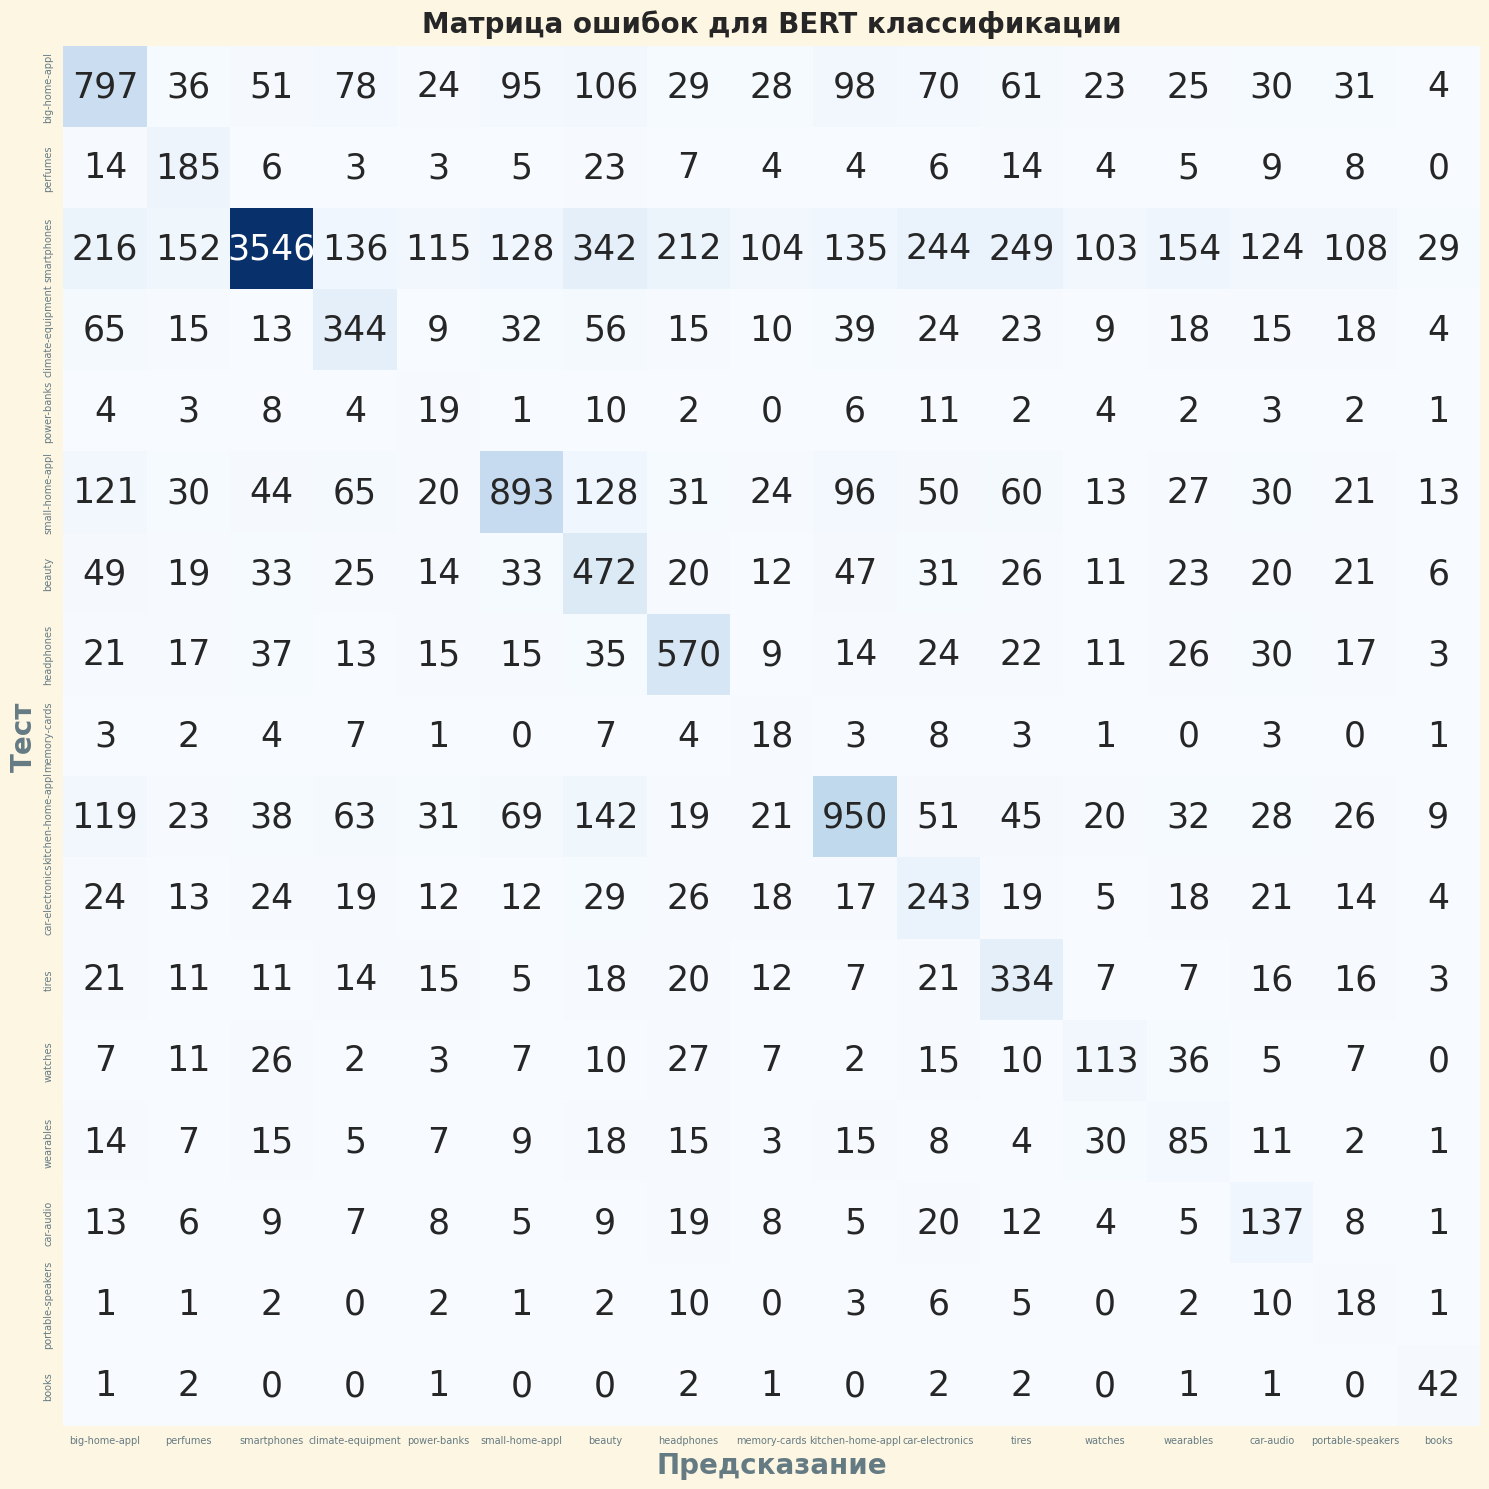

In [65]:
conf_matrix(y_test.argmax(1), y_pred_bert.argmax(1),'–ú–∞—Ç—Ä–∏—Ü–∞ –æ—à–∏–±–æ–∫ –¥–ª—è BERT –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏')

In [66]:
print('–†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫ –¥–ª—è BERT –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞:', '/n')
print(classification_report(y_test, y_pred_bert, target_names=['big-home-appl', 'perfumes', 'smartphones', 'climate-equipment',
       'power-banks', 'small-home-appl', 'beauty', 'headphones',
       'memory-cards', 'kitchen-home-appl', 'car-electronics', 'tires',
       'watches', 'wearables', 'car-audio', 'portable-speakers', 'books']))

–†–∞—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫ –¥–ª—è BERT –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞: /n
                   precision    recall  f1-score   support

    big-home-appl       0.53      0.50      0.52      1586
         perfumes       0.35      0.62      0.44       300
      smartphones       0.92      0.58      0.71      6097
climate-equipment       0.44      0.49      0.46       709
      power-banks       0.06      0.23      0.10        82
  small-home-appl       0.68      0.54      0.60      1666
           beauty       0.34      0.55      0.42       862
       headphones       0.55      0.65      0.60       879
     memory-cards       0.06      0.28      0.10        65
kitchen-home-appl       0.66      0.56      0.61      1686
  car-electronics       0.29      0.47      0.36       518
            tires       0.37      0.62      0.47       538
          watches       0.32      0.39      0.35       288
        wearables       0.18      0.34      0.24       249
        car-audio       0.28      0.50     

In [89]:
print(X_test[0])

–ü—Ä–∏–≤–µ—Ç!<br><br>–í–æ—Ç —É–∂–µ —Å –º–µ—Å—è—Ü –ø–æ–ª—å–∑—É—é—Å—å http:&#x2F;&#x2F;market.yandex.ru&#x2F;model.xml?modelid=974060<br>—Å–±—Ä–∏–≤–∞–µ—Ç –≤–æ–ª–æ—Å—ã –ø–æ–¥ –Ω–æ–ª—å –∏–ª–∏ –ø–æ—á—Ç–∏ –ø–æ–¥ –Ω–æ–ª—å –±–µ–∑ —Ä–∞–∑–¥—Ä–∞–∂–µ–Ω–∏—è –∏ –∫ –≤–µ—á–µ—Ä—É —É —Ç–µ–±—è –ª–µ–≥–∫–∞—è —â–µ—Ç–∏–Ω–∞.<br>–≠—Ç–æ Panasonic ES-6003 –≤–∑—è–ª –∑–∞ 1360 —Ä—É–±. <br><br>–ù–µ —Ç–∞–∫ –¥–∞–≤–Ω–æ —Ä–µ—à–∏–ª –ø–æ–±—Ä–∏—Ç—å—Å—è –¢-—Å—Ç–∞–Ω–∫–æ–º, –≤ –∏—Ç–æ–≥–µ –≤—Å–µ —à–µ—è –≤ –º–∏–∫—Ä–æ –ø–æ—Ä–µ–∑–∞—Ö –∏ —Ä–∞–∑–¥—Ä–∞–∂–µ–Ω–∏–µ. <br>–ë–æ–ª—å—à–µ —Å—Ç–∞–Ω–æ–∫ –ø–æ–∫–∞ —Ç—Ä–æ–≥–∞—Ç—å –Ω–µ —Ö–æ—á—É.<br>–ë—Ä–µ—é—Å—å –Ω–∞ —Å—É—Ö—É—é, –∫–∞–∫–æ–∏ÃÜ –∫–∞–∏ÃÜ—Ñ –Ω–µ –Ω–∞–¥–æ –≥–æ—Ç–æ–≤–∏—Ç—å —â–µ—Ç–∏–Ω—É - —Ä–∞—Å–ø–∞—Ä–∏–≤–∞—Ç—å –µ–µ, –∑–∞–º–∞—á–∏–≤–∞—Ç—å –ø–æ–º–∞–∑–æ–∫, –ø–µ–Ω—É –≤–∑–±–∏–≤–∞—Ç—å, –ê –í–ó–Ø–õ –ò –ü–û–ë–†–ò–õ–°–Ø!!!<br>2 –º–∏–Ω—É—Ç—ã –¥–µ–ª–æ–≤, —Ö–æ—Ç—å —Å—Ç–æ—è —É–∂–µ –≤ –∫—É—Ä—Ç–∫–µ –Ω–∞ –ø–æ—Ä–æ–≥–µ :)<br><br>–ë—Ä–∏—Ç–≤—É –≤–∑—è–ª –ø–æ—á—Ç–∏ —Å–∞–º—É—é –¥–µ—à–µ–≤—É—é. –°–∫–∞–∂—É —Ç–∞–∫ —

In [96]:
predictions = model.predict(X_test[0],)
print(predictions)

IndexError: tuple index out of range